In [18]:
import matplotlib.pyplot as plt
from sympy import *
#from IPython.display import display,Latex

# Занятие 17
# Алгебра

## Квадратичные формы

Квадратичной формой нескольких переменных $x_1,x_2,...,x_n$ называют однородный многочлен второй степени
$$
\sum_{i,j=1}^na_{ij}x_ix_j=\sum_{i=1}^na_{ii}x_i^2+2\sum_{i=1}^n\sum_{j=i+1}^na_{ij}x_ix_j 
$$
В частности, квадратичные формы двух и трех переменных можно записать в виде:
$$
a_{11}x^2+2a_{12}xy+a_{22}y^2,\qquad a_{11}x^2+a_{22}y^2+a_{33}z^2+2a_{12}xy+2a_{13}xz+2a_{23}yz
$$

Удобнее записывать квадратичные формы в матричном виде:
$$
X^TAX,\quad X=\left(\begin{matrix}x\\y\end{matrix}\right), A=\left(\begin{matrix}a_{11}&a_{12}\\a{12}&a_{22}\end{matrix}\right)
$$

####  Особенности матрицы квадратичной формы

Матрица квадратичной формы всегда симметрична. Внедиагональные элементы матрицы квадратичной формы равны половине коэффициента произведения переменных $x_ix_j$, $i\neq j$.

При переходе к новому базису матрица квадратичной формы изменяется по формуле
$$
A'=P^{T}AP
$$

В базисе из НОРМИРОВАННЫХ собственных векторов, соответствующих матрице $A$, матрица квадратичной формы имеет диагональный вид,
на диагонали собственные значения. Такой вид называется каноническим видом квадратичной формы. Приведение квадратичной формы к каноническому виду позволяет определить тип кривой или поверхности второго порядка. Канонический вид определен неоднозначно, т.е. у одной и той же квадратичной формы может быть несколько канонических видов, но выполняется 

### Закон инерции квадратичной формы

Число слагаемых с положительными (отрицательными) каноническими коэффициентами в каноническом виде квадратичной формы не зависит от способа приведения квадратичной формы к каноническому виду.

### Пример 1.

Построить матрицу квадратичной формы $u=-x^2-y^2-z^2+2xy+4xz$ и привести ее к каноническому виду. Вначале построим матрицу: 
$$
A\left(\begin{matrix}-1&1&2\\1&-1&0\\2&0&-1\end{matrix}\right)
$$
Проверим, что эта матрица задает нашу квадратичную форму, для этого вычислим
$$
X^TAX-u,\quad X=\left(\begin{matrix}x\\y\\z\end{matrix}\right), 
$$

In [19]:
x,y,z=symbols('x y z')
u=-x**2-y**2-z**2+2*x*y+4*x*z
A=Matrix([[-1,1,2],[1,-1,0],[2,0,-1]])
X=Matrix((x,y,z))
res=simplify(expand(X.transpose()*A*X))
display(X,res,res[0]-u)

Matrix([
[x],
[y],
[z]])

Matrix([[-x**2 + 2*x*y + 4*x*z - y**2 - z**2]])

0

Найдем собственные векторы матрицы $A$, нормируем их и составим из них матрицу перехода $P$:

In [20]:
ev=A.eigenvects()#собственные векторы матрицы $A$
display(ev)
#P=[ev[0][2][0],ev[1][2][0],ev[2][2][0]]
P_norm=[p[2][0].normalized() for p in ev]#нормируем собственные векторы матрицы $A$ 
display(P_norm)
P=P_norm[0].row_join(P_norm[1]).row_join(P_norm[2])
P
#P=ev[0][2][0].row_join(ev[1][2][0]).row_join(ev[2][2][0])составим из них матрицу перехода $P$

[(-1, 1, [Matrix([
   [ 0],
   [-2],
   [ 1]])]), (-1 + sqrt(5), 1, [Matrix([
   [sqrt(5)/2],
   [      1/2],
   [        1]])]), (-sqrt(5) - 1, 1, [Matrix([
   [-sqrt(5)/2],
   [       1/2],
   [         1]])])]

[Matrix([
 [           0],
 [-2*sqrt(5)/5],
 [   sqrt(5)/5]]), Matrix([
 [  sqrt(2)/2],
 [sqrt(10)/10],
 [ sqrt(10)/5]]), Matrix([
 [ -sqrt(2)/2],
 [sqrt(10)/10],
 [ sqrt(10)/5]])]

Matrix([
[           0,   sqrt(2)/2,  -sqrt(2)/2],
[-2*sqrt(5)/5, sqrt(10)/10, sqrt(10)/10],
[   sqrt(5)/5,  sqrt(10)/5,  sqrt(10)/5]])

Найдем матрицу квадратичной формы в новом базисе:

In [21]:
A_new=P.transpose()*A*P
display(simplify(A_new))

Matrix([
[-1,            0,            0],
[ 0, -1 + sqrt(5),            0],
[ 0,            0, -sqrt(5) - 1]])

Получим квадратичную форму в виде многочлена:

In [22]:
simplify(expand(X.transpose()*A_new*X))[0]

-x**2 - y**2 + sqrt(5)*y**2 - sqrt(5)*z**2 - z**2

Каноническая форма содержит квадраты переменных $x$ и $z$ с отрицательными коэффициентами, а квадрат $y$ - с положительным.

### Пример 2.

Привести матрицу квадратичной формы $u=-x^2-y^2-z^2+2xy+4xz$ из Примера 1 к каноническому виду методом выделения полных квадратов. Проверить выполнение Закона инерции.

План выделения полных квадратов:

заметим, что $y$ входит только в одно произведение разных переменных, а именно, в $2xy$, поэтому будем выделять полный квадрат так, чтобы в него вошли все слагаемые с $y$, т.е. $2xy$ и $-y^2$. До полного квадрата эти слагаемые дополняются с помощью $-x^2$, получим $-(x-y)^2$ (или $-(y-x)^2$). Делаем замену переменных $Y=y-x$, что эквивалентно $y=Y+x$:

In [23]:
Y,Z=symbols('Y Z')
display(u)
u1=simplify(expand(u.subs(y,Y+x)))
u1

-x**2 + 2*x*y + 4*x*z - y**2 - z**2

-Y**2 + 4*x*z - z**2

Видим, что $z$ входит только в одно произведение разных переменных, а именно, в $4xz$, поэтому будем выделять полный квадрат так, чтобы в него вошли все слагаемые с $z$, т.е. $4xz$ и $-z^2$. До полного квадрата эти слагаемые дополняются с помощью $-4x^2$, получим $-(2x-z)^2$ (или $-(z-2x)^2$). Делаем замену переменных $Z=z-2x$, что эквивалентно $z=Z+2x$:

In [24]:
u1=simplify(expand(u1.subs(z,Z+2*x)))
u1

-Y**2 - Z**2 + 4*x**2

Как и в примере 1, в каноническом виде два отрицательных квадрата и один положительный, Закон инерции выполняется.

## Классификация кривых второго порядка

Все кривые второго порядка на плоскости описываются уравнением вида
$$
a_{11}x^2+2a_{12}xy+a_{22}y^2+2a_1x+2a_2y+a_0=0\qquad(1)
$$

Невырожденные кривые второго порядка - эллипс, гипербола и парабола.

Для классификации кривых нужно привести уравнение (1) к каноническому виду.

Пусть $a_{12}\neq0$.

Вначале приведем к каноническому виду квадратичную форму из уравнения (1), в качестве матрицы перехода к новому базису можно использовать матрицу поворота на угол $\alpha$:
$$
\left(\begin{matrix}\cos\alpha&-\sin\alpha\\ \sin\alpha&\cos\alpha\end{matrix}\right)
$$
угол $\alpha$ находится из условия 
$$
{\rm ctg}(2\alpha)=\frac{a_{11}-a_{22}}{2a_{12}}
$$

В результате получаем уравнение вида (1), но с нулевым коэффициентом при $xy$.

Рассмотрим разные случаи:

1) если $a_{11}\neq0$, $a_{22}\neq0$, то от слагаемых $a_1x$ и $a_2y$ можно избавиться переносом начала координат, соответствующая замена переменных 
$$
x=x'-\frac{a_1}{a_{11}},\quad y=y'-\frac{a_2}{a_{22}}\qquad(2)
$$

После такой замены уравнение кривой примет вид
$$
a_{11}x^2+a_{22}y^2+a_0=0\qquad(3)
$$

Если $a_{11}a_{22}>0$, причем $a_{11} a_0<0$, то кривая - эллипс или окружность.

Если $a_{11}a_{22}<0$, причем $a_0\neq 0$, то кривая - гипербола.

Остальные варианты случая 1)  вырожденные  (прямые, точки, пустое множество).

2) если $a_{11}\neq0$, $a_{22}=0$ ($a_{11}=0$, $a_{22}\neq0$), тогда в уравнении (1) с нулевым коэффициентом при $xy$ можно избавиться от $a_1x$ ($a_2y$) переносом начала координат.

После переноса получаем каноническое уравнение параболы или вырожденный случай.



### Пример 3.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2-2xy-y^2+4x-2=0
$$
Вначале найдем угол поворота для избавления от слагаемого $-2xy$

In [25]:
x1,y1=symbols('x1 y1')
A=Matrix([[1,-1],[-1,-1]])
alpha=acot((A[0,0]-A[1,1])/(2*A[0,1]))/2
display(alpha) 

-pi/8

Составим матрицу перехода (поворота). Введем новые координаты $x1$ и $y1$, выразим через них старые координаты с помощью матрицы перехода.

In [26]:
P=Matrix([[cos(alpha),-sin(alpha)],[sin(alpha),cos(alpha)]])
display(P)
X1=Matrix((x1,y1))
X_new=P*X1
display(X_new)
eq=x**2-2*x*y-y**2+4*x-2
eq1=simplify(expand(eq.subs({x:X_new[0],y:X_new[1]})))
eq1

Matrix([
[  sqrt(sqrt(2)/4 + 1/2), sqrt(-sqrt(2)/4 + 1/2)],
[-sqrt(-sqrt(2)/4 + 1/2),  sqrt(sqrt(2)/4 + 1/2)]])

Matrix([
[ x1*sqrt(sqrt(2)/4 + 1/2) + y1*sqrt(-sqrt(2)/4 + 1/2)],
[-x1*sqrt(-sqrt(2)/4 + 1/2) + y1*sqrt(sqrt(2)/4 + 1/2)]])

sqrt(2)*x1**2 + 2*x1*sqrt(sqrt(2) + 2) - sqrt(2)*y1**2 + 2*y1*sqrt(-sqrt(2) + 2) - 2

Видим, что слагаемое $x_1y_1$ отсутствует.

Можно обойтись без подстановок.

Составляем матрицу коэффициентов уравнения $AA$ и вектор переменных, в нем последняя координата 1, она нужна для слагаемых первого и нулевого порядков:

In [27]:
AA=Matrix([[1,-1,2],[-1,-1,0],[2,0,-2]])
display(AA)
XX=Matrix((x,y,1))
display(XX)

Matrix([
[ 1, -1,  2],
[-1, -1,  0],
[ 2,  0, -2]])

Matrix([
[x],
[y],
[1]])

Убедимся, что эта матрица действительно определяет наше уравнение:

In [28]:
simplify(expand(XX.transpose()*AA*XX))

Matrix([[x**2 - 2*x*y + 4*x - y**2 - 2]])

Теперь составим матрицу поворота, она трехмерная, только правый нижний элемент равен 1. 

In [29]:
P=Matrix([[cos(alpha),-sin(alpha),0],[sin(alpha),cos(alpha),0],[0,0,1]])
display(P)

Matrix([
[  sqrt(sqrt(2)/4 + 1/2), sqrt(-sqrt(2)/4 + 1/2), 0],
[-sqrt(-sqrt(2)/4 + 1/2),  sqrt(sqrt(2)/4 + 1/2), 0],
[                      0,                      0, 1]])

После поворота (уже в новых координатах $x_1$, $y_1$) наша матрица примет вид

In [30]:
AA1=simplify(expand((P.transpose()*AA*P)))
display(AA1)

Matrix([
[          sqrt(2),                  0,  sqrt(sqrt(2) + 2)],
[                0,           -sqrt(2), sqrt(-sqrt(2) + 2)],
[sqrt(sqrt(2) + 2), sqrt(-sqrt(2) + 2),                 -2]])

Запишем получившееся уравнение

In [31]:
X1=Matrix((x1,y1,1))
simplify(expand((X1.transpose()*AA1*X1)[0]))

sqrt(2)*x1**2 + 2*x1*sqrt(sqrt(2) + 2) - sqrt(2)*y1**2 + 2*y1*sqrt(-sqrt(2) + 2) - 2

Видим, что уравнение получилось точно такое же, как в результате подстановок, осуществляющих поворот.

Осталось перенести начало координат так, чтобы исчезли слагаемые с $x$ и $y$. Соответствующая замена имеет вид (2):
$$
x=x'-\frac{a_1}{a_{11}},\quad y=y'-\frac{a_2}{a_{22}}
$$

In [32]:
X1_new=Matrix((x1,y1,1))
X1_new[0]-=AA1[0,2]/AA1[0,0]
X1_new[1]-=AA1[1,2]/AA1[1,1]
display(X1_new)
eq_new=simplify(expand(X1_new.transpose()*AA1*X1_new))[0]
display(eq_new)

Matrix([
[ x1 - sqrt(2)*sqrt(sqrt(2) + 2)/2],
[y1 + sqrt(2)*sqrt(-sqrt(2) + 2)/2],
[                                1]])

sqrt(2)*x1**2 - sqrt(2)*y1**2 - 4

Осталось поделить выражение на 4 и перенести свободный член в правую часть:

In [33]:
free=eq_new.subs({x1:0,y1:0})
eq_last=eq_new/(-free)+1
Eq(eq_last,1)

Eq(sqrt(2)*x1**2/4 - sqrt(2)*y1**2/4, 1)

Изоразим на графике исходную кривую и получившуюся гиперболу.

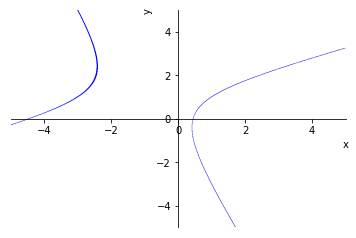

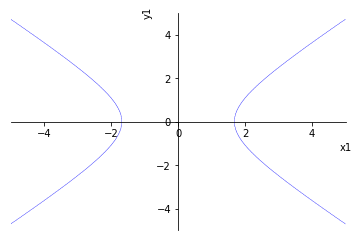

In [34]:
plot_implicit(eq)
plot_implicit(eq_last-1)